<a href="https://colab.research.google.com/github/DilakshanRahul12/CM2604/blob/main/DPP_bank_additional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = '/content/drive/MyDrive/CM2604/dataset/bank-additional/bank-additional-full.csv'

In [4]:
df = pd.read_csv(dataset, sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
def print_unique_value_counts(df):
    for column in df.columns:
        unique_counts = df[column].value_counts()
        print(f"Column: {column}")
        print(unique_counts)
        print("\n")

### Handling Missing Values

without unknowns

In [5]:
df_non = df.replace("unknown", None).dropna()

In [6]:
df_non.shape

(30488, 21)

### Removing Outlier

In [8]:
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

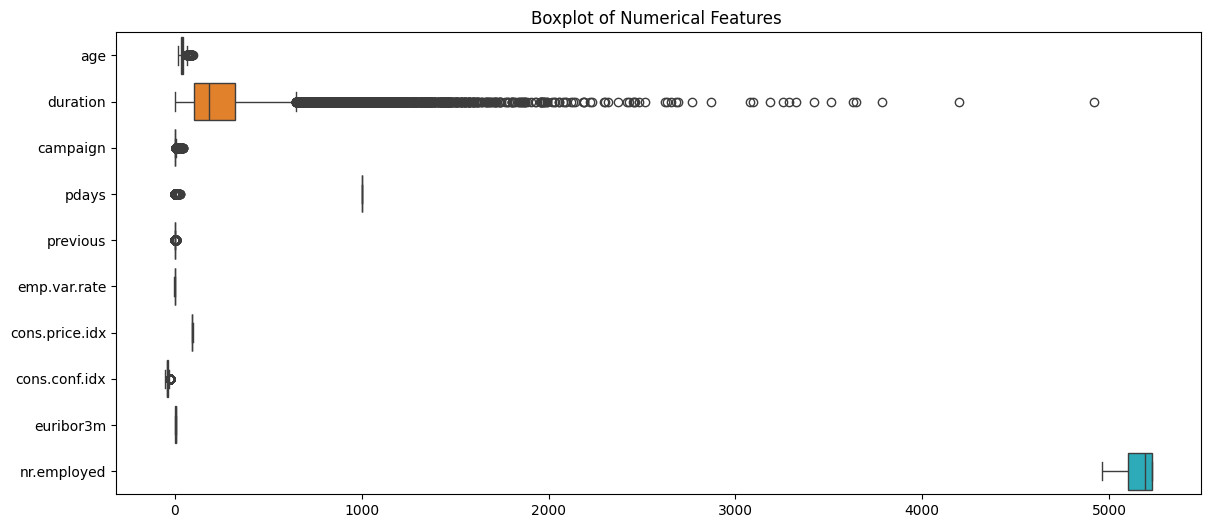

In [9]:
#outlier
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_non[numerical_columns], orient="h")
plt.title("Boxplot of Numerical Features ")
plt.show()


removing outlier

Original Dataset Size: **30488 rows**

* With duration
    * Dataset Size after Removing Outliers: **27399 rows**
* without duration
    * Dataset Size after Removing Outliers: **27991 rows**
* duration < 1348
    * Dataset Size after Removing Outliers: **27758 rows**
* duration < 814
    * Dataset Size after Removing Outliers: **26845 rows**

#### Without duration

In [ ]:
numerical_columns.remove("duration") # removed duration
df_non_dur = df_non.drop('duration', axis=1)

In [ ]:
# Calculate Z-Score for numerical columns
z_scores = np.abs((df_non_dur[numerical_columns] - df_non_dur[numerical_columns].mean()) / df_non_dur[numerical_columns].std())

# Set threshold for Z-Score (commonly 3)
threshold = 3

# Find rows where all Z-Scores are within the threshold
non_outliers = (z_scores < threshold).all(axis=1)

# Filter the DataFrame to keep only non-outliers
df_cleaned = df[non_outliers]

# Display the result
print(f"Original Dataset Size: {df.shape[0]} rows")
print(f"Dataset Size after Removing Outliers: {df_cleaned.shape[0]} rows")


Original Dataset Size: 30488 rows
Dataset Size after Removing Outliers: 27991 rows


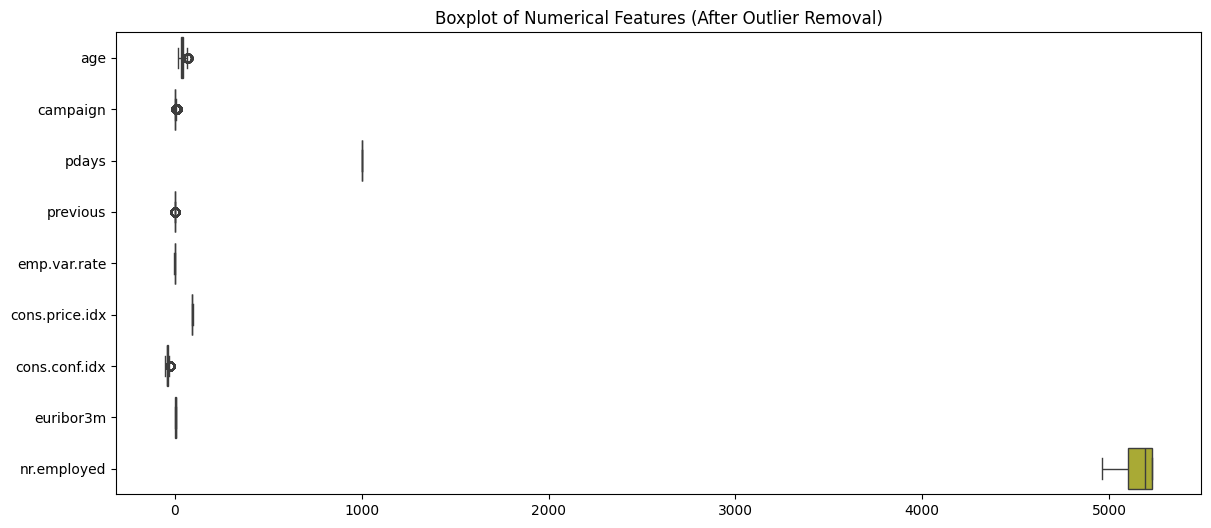

In [ ]:
# After outlier removal
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_cleaned[numerical_columns], orient="h")
plt.title("Boxplot of Numerical Features (After Outlier Removal)")
plt.show()

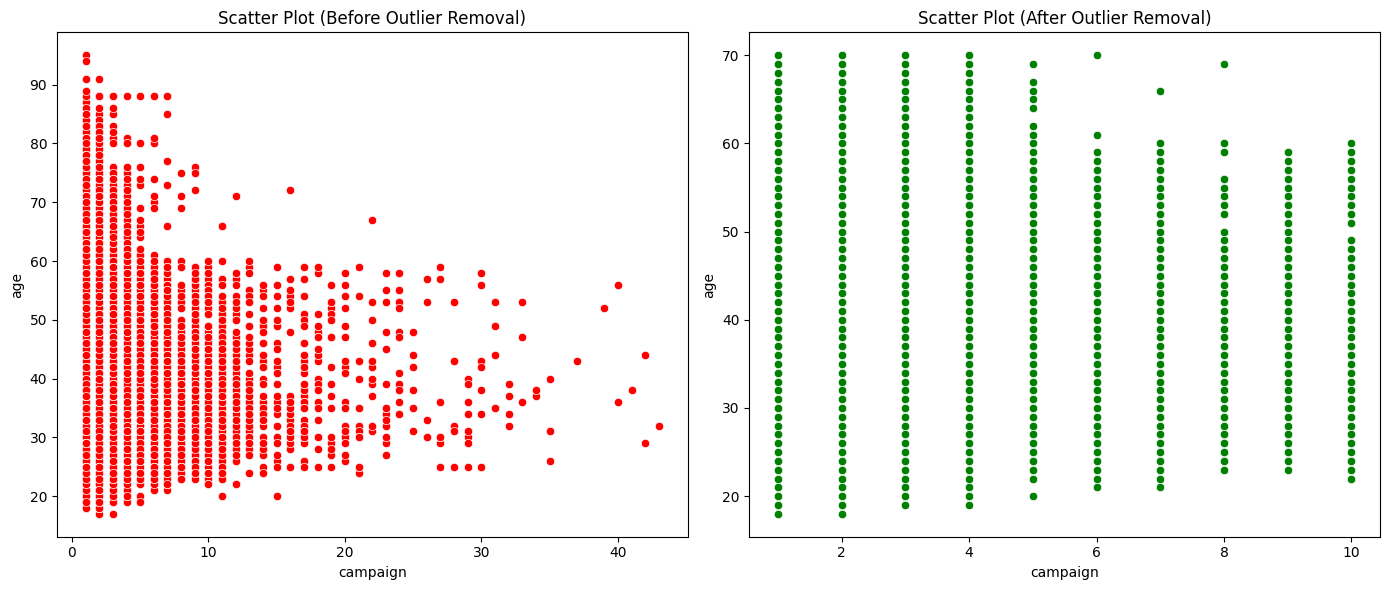

In [ ]:
# Scatter plot before and after outlier removal
plt.figure(figsize=(14, 6))

# Before outlier removal
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='campaign', y='age', color='red')
plt.title("Scatter Plot (Before Outlier Removal)")

# After outlier removal
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_cleaned, x='campaign', y='age', color='green')
plt.title("Scatter Plot (After Outlier Removal)")

plt.tight_layout()
plt.show()

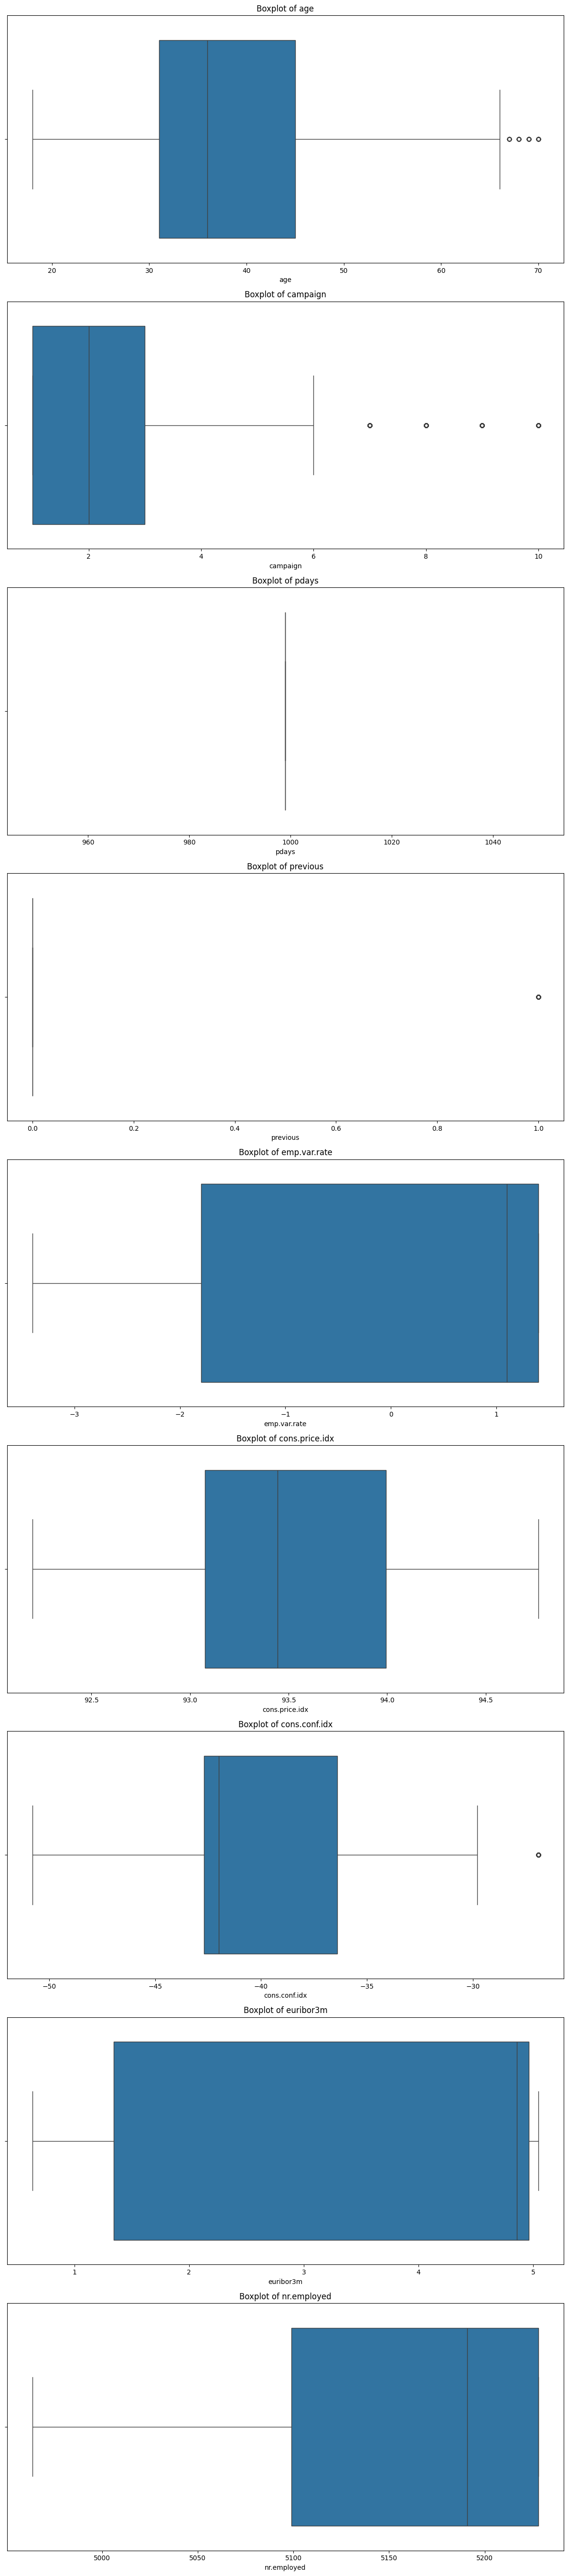

In [ ]:
plt.figure(figsize=(12, 6 * len(numerical_columns)))  # Adjust figure size as needed

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
df_cleaned.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
from sklearn.preprocessing import StandardScaler

df_std = df_cleaned.copy()

# Select numerical columns for standardization
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
df_std[numerical_cols] = scaler.fit_transform(df_std[numerical_cols])

# Display the standardized data
df_std.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.861420,housemaid,married,basic.4y,no,no,no,telephone,may,mon,-0.741791,0.0,-0.342449,nonexistent,0.677404,0.81801,0.948252,0.731781,0.328029,no
2,-0.164631,services,married,high.school,no,yes,no,telephone,may,mon,-0.741791,0.0,-0.342449,nonexistent,0.677404,0.81801,0.948252,0.731781,0.328029,no
3,0.155271,admin.,married,basic.6y,no,no,no,telephone,may,mon,-0.741791,0.0,-0.342449,nonexistent,0.677404,0.81801,0.948252,0.731781,0.328029,no
4,1.861420,services,married,high.school,no,no,yes,telephone,may,mon,-0.741791,0.0,-0.342449,nonexistent,0.677404,0.81801,0.948252,0.731781,0.328029,no
6,2.181322,admin.,married,professional.course,no,no,no,telephone,may,mon,-0.741791,0.0,-0.342449,nonexistent,0.677404,0.81801,0.948252,0.731781,0.328029,no


In [ ]:
df_encoded = df_std.copy()
print(df_encoded.select_dtypes(include=['object']).isna().sum())

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
y              0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders and store mappings
label_encoders = {}
mappings = {}

# Iterate through categorical columns
for column in df_encoded.select_dtypes(include=['object']):
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le
    mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the mappings
for column, mapping in mappings.items():
    print(f"Mappings for column '{column}':")
    print(mapping)
    print("---")

Mappings for column 'job':
{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10}
---
Mappings for column 'marital':
{'divorced': 0, 'married': 1, 'single': 2}
---
Mappings for column 'education':
{'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6}
---
Mappings for column 'default':
{'no': 0, 'yes': 1}
---
Mappings for column 'housing':
{'no': 0, 'yes': 1}
---
Mappings for column 'loan':
{'no': 0, 'yes': 1}
---
Mappings for column 'contact':
{'cellular': 0, 'telephone': 1}
---
Mappings for column 'month':
{'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}
---
Mappings for column 'day_of_week':
{'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4}
---
Mappings for column 'poutcome':
{'failure': 0, 'nonexistent': 1}
---
Mappings for column

In [ ]:
df_encoded.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.861420,3,1,0,0,0,0,1,6,1,-0.741791,0.0,-0.342449,1,0.677404,0.81801,0.948252,0.731781,0.328029,0
2,-0.164631,7,1,3,0,1,0,1,6,1,-0.741791,0.0,-0.342449,1,0.677404,0.81801,0.948252,0.731781,0.328029,0
3,0.155271,0,1,1,0,0,0,1,6,1,-0.741791,0.0,-0.342449,1,0.677404,0.81801,0.948252,0.731781,0.328029,0
4,1.861420,7,1,3,0,0,1,1,6,1,-0.741791,0.0,-0.342449,1,0.677404,0.81801,0.948252,0.731781,0.328029,0
6,2.181322,0,1,5,0,0,0,1,6,1,-0.741791,0.0,-0.342449,1,0.677404,0.81801,0.948252,0.731781,0.328029,0


#### duration less than 1348

In [10]:
df_dur = df_non[df_non['duration'] < 814].copy()
df_dur.shape

(29243, 21)

In [21]:
print_unique_value_counts(df_dur)

Column: age
age
31    1568
32    1489
33    1472
30    1377
34    1374
      ... 
89       2
95       1
87       1
91       1
94       1
Name: count, Length: 76, dtype: int64


Column: job
job
admin.           8375
blue-collar      5429
technician       5271
services         2743
management       2215
retired          1165
entrepreneur     1042
self-employed    1037
unemployed        716
housemaid         663
student           587
Name: count, dtype: int64


Column: marital
marital
married     16774
single       9054
divorced     3415
Name: count, dtype: int64


Column: education
education
university.degree      9986
high.school            7366
professional.course    4167
basic.9y               4095
basic.4y               2296
basic.6y               1323
illiterate               10
Name: count, dtype: int64


Column: default
default
no     29240
yes        3
Name: count, dtype: int64


Column: housing
housing
yes    15847
no     13396
Name: count, dtype: int64


Column: loan
loan
no   

In [11]:
nc = [col for col in numerical_columns if col != 'duration']   # without duration cuz we already did

In [13]:
# Calculate Z-Score for numerical columns
z_scores = np.abs((df_dur[nc] - df_dur[nc].mean()) / df_dur[nc].std())

# Set threshold for Z-Score (commonly 3)
threshold = 3

# Find rows where all Z-Scores are within the threshold
non_outliers = (z_scores < threshold).all(axis=1)

# Filter the DataFrame to keep only non-outliers
df_handled = df_dur[non_outliers]

# Display the result
print(f"Original Dataset Size: {df_non.shape[0]} rows")
print(f"Dataset Size after Removing Outliers: {df_handled.shape[0]} rows")


Original Dataset Size: 30488 rows
Dataset Size after Removing Outliers: 26845 rows


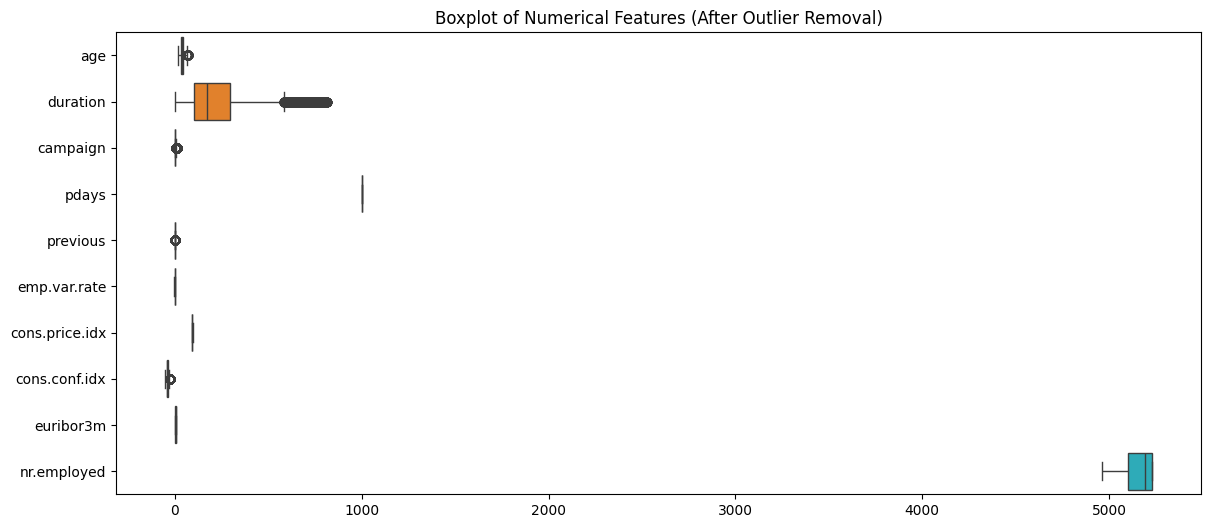

In [14]:
# After outlier removal
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_handled[numerical_columns], orient="h")
plt.title("Boxplot of Numerical Features (After Outlier Removal)")
plt.show()

In [15]:
df_handled.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
for col in df_handled.columns:
    print(f"--- {col} ---")
    print(df_handled[col].value_counts())
    print("\n")

--- age ---
age
31    1489
32    1405
33    1392
34    1290
30    1283
36    1256
35    1246
29    1108
37    1010
39     940
38     931
41     822
40     732
42     719
28     710
43     660
27     619
44     606
46     602
45     599
48     593
47     540
26     517
50     486
49     473
52     448
25     440
53     417
51     412
54     379
55     360
56     355
58     333
57     327
24     318
59     232
23     172
60     119
22      94
21      74
61      48
20      37
63      32
64      30
62      29
70      29
66      26
69      25
65      22
68      18
67      17
19      12
18      12
Name: count, dtype: int64


--- job ---
job
admin.           7668
blue-collar      5178
technician       4941
services         2587
management       2062
entrepreneur      989
self-employed     980
retired           733
unemployed        636
housemaid         602
student           469
Name: count, dtype: int64


--- marital ---
marital
married     15457
single       8271
divorced     3117
Name: cou

In [14]:
from sklearn.preprocessing import StandardScaler

df_std1 = df_handled.copy()

df_std1['duration'] = np.log1p(df_std1['duration'])  # log(1 + x) for duration

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
df_std1[numerical_columns] = scaler.fit_transform(df_std1[numerical_columns])

# Display the standardized data
df_std1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.860701,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-0.738924,0.0,-0.343689,nonexistent,0.678693,0.819661,0.944609,0.732834,0.329645,no
2,-0.164323,services,married,high.school,no,yes,no,telephone,may,mon,...,-0.738924,0.0,-0.343689,nonexistent,0.678693,0.819661,0.944609,0.732834,0.329645,no
3,0.155418,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-0.738924,0.0,-0.343689,nonexistent,0.678693,0.819661,0.944609,0.732834,0.329645,no
4,1.860701,services,married,high.school,no,no,yes,telephone,may,mon,...,-0.738924,0.0,-0.343689,nonexistent,0.678693,0.819661,0.944609,0.732834,0.329645,no
6,2.180442,admin.,married,professional.course,no,no,no,telephone,may,mon,...,-0.738924,0.0,-0.343689,nonexistent,0.678693,0.819661,0.944609,0.732834,0.329645,no


In [63]:
df_encoded1 = df_std1.copy()

In [64]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders and store mappings
label_encoders = {}
mappings = {}

# Iterate through categorical columns
for column in df_encoded1.select_dtypes(include=['object']):
    le = LabelEncoder()
    df_encoded1[column] = le.fit_transform(df_encoded1[column])
    label_encoders[column] = le
    mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the mappings
for column, mapping in mappings.items():
    print(f"Mappings for column '{column}':")
    print(mapping)
    print("---")

Mappings for column 'job':
{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10}
---
Mappings for column 'marital':
{'divorced': 0, 'married': 1, 'single': 2}
---
Mappings for column 'education':
{'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6}
---
Mappings for column 'default':
{'no': 0, 'yes': 1}
---
Mappings for column 'housing':
{'no': 0, 'yes': 1}
---
Mappings for column 'loan':
{'no': 0, 'yes': 1}
---
Mappings for column 'contact':
{'cellular': 0, 'telephone': 1}
---
Mappings for column 'month':
{'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}
---
Mappings for column 'day_of_week':
{'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4}
---
Mappings for column 'poutcome':
{'failure': 0, 'nonexistent': 1}
---
Mappings for column

In [65]:
df_encoded1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.860701,3,1,0,0,0,0,1,6,1,...,-0.738924,0.0,-0.343689,1,0.678693,0.819661,0.944609,0.732834,0.329645,0
2,-0.164323,7,1,3,0,1,0,1,6,1,...,-0.738924,0.0,-0.343689,1,0.678693,0.819661,0.944609,0.732834,0.329645,0
3,0.155418,0,1,1,0,0,0,1,6,1,...,-0.738924,0.0,-0.343689,1,0.678693,0.819661,0.944609,0.732834,0.329645,0
4,1.860701,7,1,3,0,0,1,1,6,1,...,-0.738924,0.0,-0.343689,1,0.678693,0.819661,0.944609,0.732834,0.329645,0
6,2.180442,0,1,5,0,0,0,1,6,1,...,-0.738924,0.0,-0.343689,1,0.678693,0.819661,0.944609,0.732834,0.329645,0


#### Corr

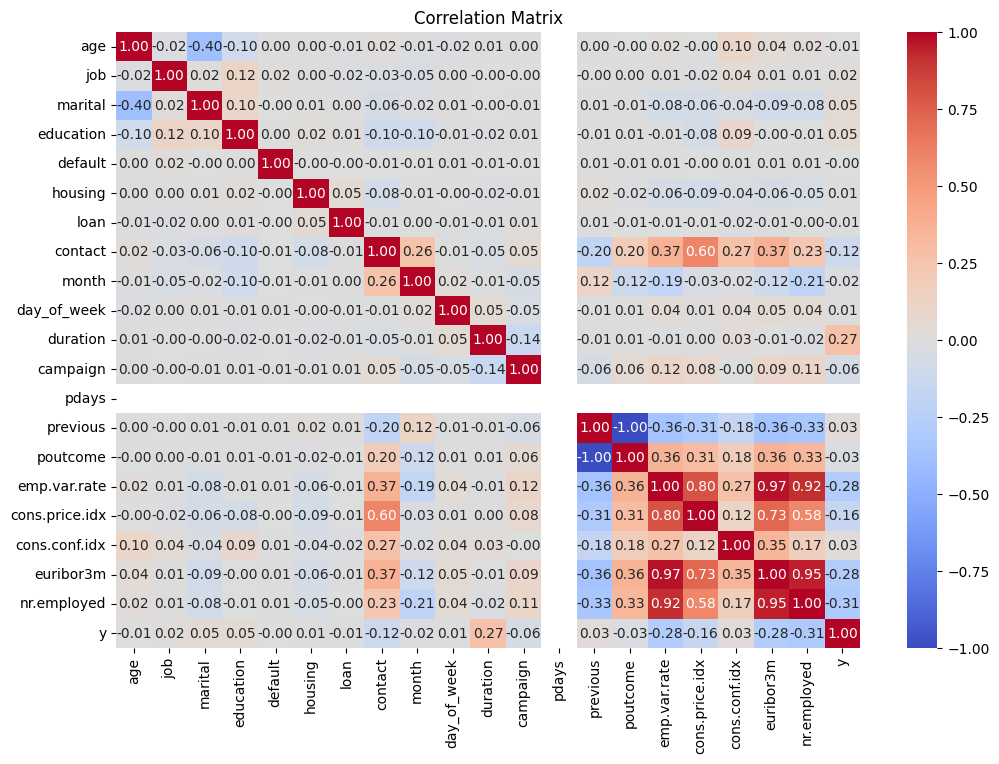

In [66]:
# Compute the correlation matrix
correlation_matrix = df_encoded1.corr()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [67]:
# Select the specified columns
cols_to_correlate = ['emp.var.rate', 'euribor3m', 'nr.employed']
correlation_matrix = df_encoded1[cols_to_correlate].corr()

# Display the correlation matrix
correlation_matrix

,emp.var.rate,euribor3m,nr.employed
emp.var.rate,1.000000,0.972965,0.919500
euribor3m,0.972965,1.000000,0.949704
nr.employed,0.919500,0.949704,1.000000


### Feature Engineering

In [92]:
df_feat = df_encoded1.copy()

emp.var.rate & euribor3m &	nr.employed

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
economic_features = df_feat[['emp.var.rate', 'euribor3m', 'nr.employed']]
df_feat['economic_pca'] = pca.fit_transform(economic_features)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.96498248]


In [94]:
df_feat.drop(['euribor3m', 'nr.employed'], axis=1, inplace=True)

previous vs outcome

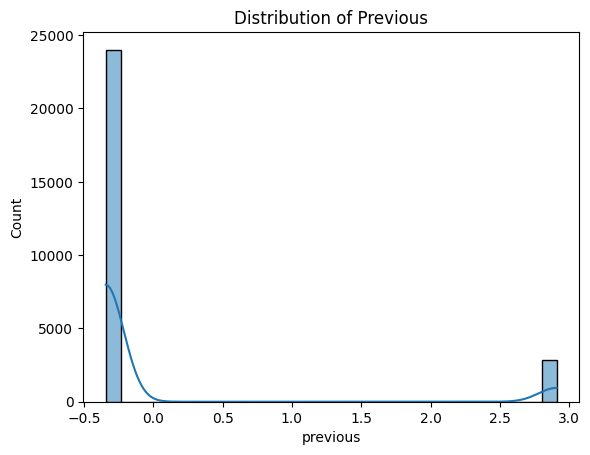

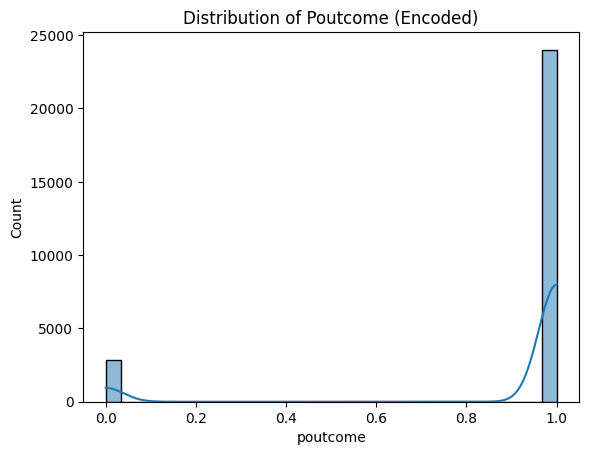

In [95]:
sns.histplot(df_feat['previous'], kde=True, bins=30)
plt.title('Distribution of Previous')
plt.show()

sns.histplot(df_feat['poutcome'], kde=True, bins=30)
plt.title('Distribution of Poutcome (Encoded)')
plt.show()


In [96]:
df_feat['previous_poutcome_interaction'] = df_feat['previous'] * df_feat['poutcome']

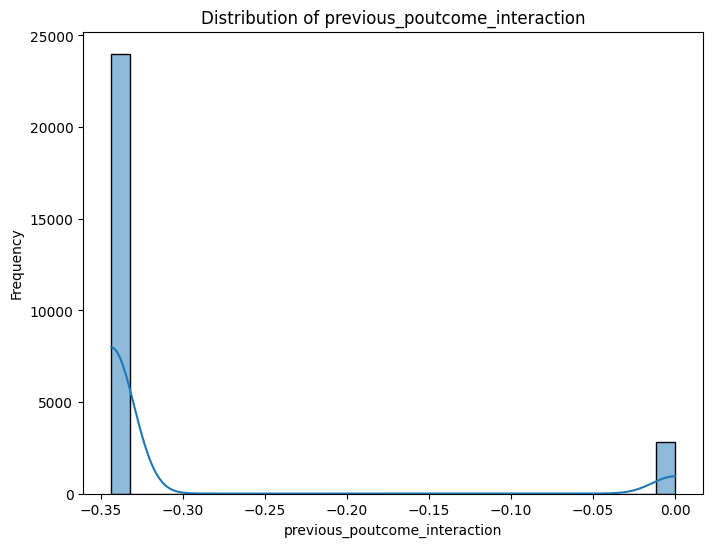

In [97]:
plt.figure(figsize=(8, 6))
sns.histplot(df_feat['previous_poutcome_interaction'], kde=True, bins=30)
plt.title('Distribution of previous_poutcome_interaction')
plt.xlabel('previous_poutcome_interaction')
plt.ylabel('Frequency')
plt.show()

In [98]:
df_feat.drop('previous',axis = 1,inplace = True)
df_feat.drop('poutcome',axis = 1,inplace = True)

##### economic_stability

temp function

In [99]:
df_feat['economic_stability'] = (df_feat['emp.var.rate'] + df_feat['cons.price.idx'] - df_feat['cons.conf.idx']) / 3

In [100]:
df_feat.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,y,economic_pca,previous_poutcome_interaction,economic_stability
0,1.860701,3,1,0,0,0,0,1,6,1,0.559186,-0.738924,0.0,0.678693,0.819661,0.944609,0,1.007363,-0.343689,0.184582
2,-0.164323,7,1,3,0,1,0,1,6,1,0.387640,-0.738924,0.0,0.678693,0.819661,0.944609,0,1.007363,-0.343689,0.184582
3,0.155418,0,1,1,0,0,0,1,6,1,-0.092168,-0.738924,0.0,0.678693,0.819661,0.944609,0,1.007363,-0.343689,0.184582
4,1.860701,7,1,3,0,0,1,1,6,1,0.752698,-0.738924,0.0,0.678693,0.819661,0.944609,0,1.007363,-0.343689,0.184582
6,2.180442,0,1,5,0,0,0,1,6,1,-0.190551,-0.738924,0.0,0.678693,0.819661,0.944609,0,1.007363,-0.343689,0.184582


In [76]:
df_feat['economic_stability'].describe()

,economic_stability
count,2.684500e+04
mean,-1.632991e-14
std,6.506811e-01
min,-2.384104e+00
25%,-1.997746e-01
50%,-9.641893e-02
75%,6.605572e-01
max,1.212639e+00


In [101]:
# prompt: data trasform economic_stability (minmax)

from sklearn.preprocessing import MinMaxScaler

# Assuming df_encoded1 is your DataFrame
scaler = MinMaxScaler()
df_feat['economic_stability'] = scaler.fit_transform(df_feat[['economic_stability']])
df_feat.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,y,economic_pca,previous_poutcome_interaction,economic_stability
0,1.860701,3,1,0,0,0,0,1,6,1,0.559186,-0.738924,0.0,0.678693,0.819661,0.944609,0,1.007363,-0.343689,0.71417
2,-0.164323,7,1,3,0,1,0,1,6,1,0.387640,-0.738924,0.0,0.678693,0.819661,0.944609,0,1.007363,-0.343689,0.71417
3,0.155418,0,1,1,0,0,0,1,6,1,-0.092168,-0.738924,0.0,0.678693,0.819661,0.944609,0,1.007363,-0.343689,0.71417
4,1.860701,7,1,3,0,0,1,1,6,1,0.752698,-0.738924,0.0,0.678693,0.819661,0.944609,0,1.007363,-0.343689,0.71417
6,2.180442,0,1,5,0,0,0,1,6,1,-0.190551,-0.738924,0.0,0.678693,0.819661,0.944609,0,1.007363,-0.343689,0.71417


In [102]:
df_dt = df_feat.copy()
df_dt.drop('emp.var.rate',axis = 1,inplace = True)
df_dt.drop('cons.price.idx',axis = 1,inplace = True)
df_dt.drop('cons.conf.idx',axis = 1,inplace = True)

In [103]:
df_dt.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,y,economic_pca,previous_poutcome_interaction,economic_stability
0,1.860701,3,1,0,0,0,0,1,6,1,0.559186,-0.738924,0.0,0,1.007363,-0.343689,0.71417
2,-0.164323,7,1,3,0,1,0,1,6,1,0.387640,-0.738924,0.0,0,1.007363,-0.343689,0.71417
3,0.155418,0,1,1,0,0,0,1,6,1,-0.092168,-0.738924,0.0,0,1.007363,-0.343689,0.71417
4,1.860701,7,1,3,0,0,1,1,6,1,0.752698,-0.738924,0.0,0,1.007363,-0.343689,0.71417
6,2.180442,0,1,5,0,0,0,1,6,1,-0.190551,-0.738924,0.0,0,1.007363,-0.343689,0.71417


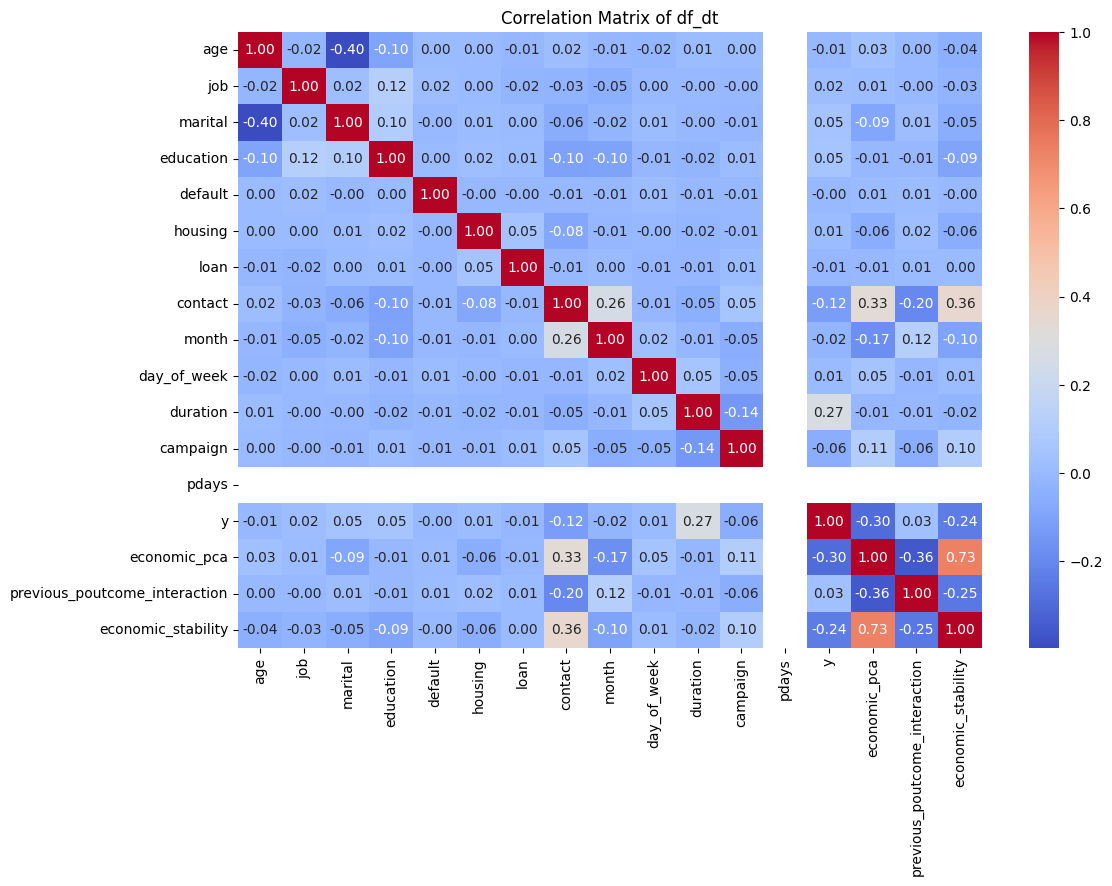

In [104]:
# prompt: do cor on df_dt

# Compute the correlation matrix
correlation_matrix = df_dt.corr()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_dt")
plt.show()

In [108]:
# prompt: do bagging for the class imbalance in df_dt

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assuming 'y' is your target variable column name
X = df_dt.drop('y', axis=1)
y = df_dt['y']

# Address class imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the BaggingClassifier with a DecisionTreeClassifier as the base estimator
# In older versions of scikit-learn, the 'base_estimator' argument might not be available.
# Instead, you might need to use the 'estimator' argument.
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42) # Adjust n_estimators as needed
bagging_model.fit(X_train, y_train)

# Make predictions and evaluate the model (example using accuracy)
from sklearn.metrics import accuracy_score
y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Classifier: {accuracy}")

# You can further evaluate the model with other metrics like precision, recall, F1-score, etc.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy of Bagging Classifier: 0.9724473257698542
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4928
           1       0.95      1.00      0.97      4944

    accuracy                           0.97      9872
   macro avg       0.97      0.97      0.97      9872
weighted avg       0.97      0.97      0.97      9872



In [109]:
# prompt: with the bagged dataset do a random forest

from sklearn.ensemble import RandomForestClassifier

# ... (Your existing code) ...

# Assuming 'y' is your target variable column name
X = df_dt.drop('y', axis=1)
y = df_dt['y']

# Address class imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
random_forest_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy}")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy of Random Forest Classifier: 0.9756888168557536
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      4928
           1       0.95      1.00      0.98      4944

    accuracy                           0.98      9872
   macro avg       0.98      0.98      0.98      9872
weighted avg       0.98      0.98      0.98      9872



In [105]:
# prompt: create a random forest model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming df_dt is your preprocessed DataFrame and 'y' is your target variable column
X = df_dt.drop('y', axis=1)
y = df_dt['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust hyperparameters
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9325758986775936
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4956
           1       0.61      0.35      0.45       413

    accuracy                           0.93      5369
   macro avg       0.78      0.67      0.71      5369
weighted avg       0.92      0.93      0.92      5369

